# 【問題1】1次関数
xが-50から50の範囲で次の式を考えます。

$$
y =\frac{１}{２}x + 1
$$
-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [2]:
import numpy as np

x = np.arange(-50, 50.1, 0.1).reshape(-1,1)

def y(x):
    return  0.5*x +1

print(type(x))
print(type(y(x)))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# 【問題2】配列の結合
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。


In [3]:
z = np.concatenate((x, y(x)), axis=1)
print(z)
print(np.shape(z))

[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]
(1001, 2)


# 【問題3】勾配を求める
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。
各変化量は以下の図のように隣同士の要素の差から近似的に求めます。

In [4]:
d_x = x[1:] - x[:-1]
#print(d_x)

d_y = y(x)[1:] - y(x)[:-1]
#print(d_y)

slope = d_y / d_x
print(np.shape(slope))

(1000, 1)


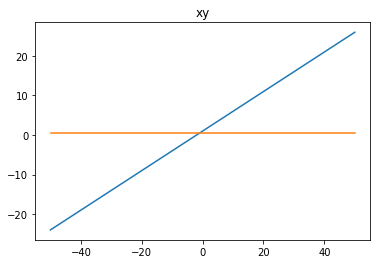

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("xy")
plt.plot(x, y(x))
plt.plot(x[1:], slope)
plt.show()

# 【問題5】Pythonの関数化
問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。
そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。


また、問題4と同様にグラフを描いてください。
ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。

In [146]:
''' # サンプルコード
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
  """
  変化量を使い勾配を計算する。

  Parameters
  ----------------
  function : function
    求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
  x_range : tuple
    np.arange()の引数と同じ方法で範囲を指定する。

  Returns
  ----------------
  array_xy : ndarray, shape(n, 2)
    xとyを結合したもの。nはx_rangeに依存する。
  gradient : ndarray, shape(n-1,)
    関数の勾配。差をとるため要素は1つ減る
  """
  pass
  return array_xy, gradient
def function1(array_x):
    pass
    return array_y
array_xy, gradient = compute_gradient(function1)
'''

' # サンプルコード\ndef compute_gradient(function, x_range=(-50, 50.1, 0.1)):\n  """\n  変化量を使い勾配を計算する。\n\n  Parameters\n  ----------------\n  function : function\n    求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。\n  x_range : tuple\n    np.arange()の引数と同じ方法で範囲を指定する。\n\n  Returns\n  ----------------\n  array_xy : ndarray, shape(n, 2)\n    xとyを結合したもの。nはx_rangeに依存する。\n  gradient : ndarray, shape(n-1,)\n    関数の勾配。差をとるため要素は1つ減る\n  """\n  pass\n  return array_xy, gradient\ndef function1(array_x):\n    pass\n    return array_y\narray_xy, gradient = compute_gradient(function1)\n'

In [59]:
import cmath

def gradient(function, x_range=(-50, 50.1, 0.1)):
    start, end, step = x_range
    x = np.arange(start, end, step).reshape(-1,1)
    #y = np.around(function(x), decimals=20)
    y = function(x)
    z = np.concatenate((x, y), axis=1)

    d_x = x[1:] - x[:-1]
    #print(d_x)
    d_y = y[1:] - y[:-1]
    #print(d_y)
    gradient = d_y / d_x

    return z, gradient 
    
def y_1(x):
    return x**2

def y_2(x):
    return (2*x)**2 + (2**x)

def y_3(x):
    return np.sin(x**0.5)

x_range = (0, 50.1, 0.1)

z_1, g_1 = gradient(y_1)
z_2, g_2 = gradient(y_2)
z_3, g_3 = gradient(y_3, x_range)

print(g_2)

[[-3.99600000e+02]
 [-3.98800000e+02]
 [-3.98000000e+02]
 [-3.97200000e+02]
 [-3.96400000e+02]
 [-3.95600000e+02]
 [-3.94800000e+02]
 [-3.94000000e+02]
 [-3.93200000e+02]
 [-3.92400000e+02]
 [-3.91600000e+02]
 [-3.90800000e+02]
 [-3.90000000e+02]
 [-3.89200000e+02]
 [-3.88400000e+02]
 [-3.87600000e+02]
 [-3.86800000e+02]
 [-3.86000000e+02]
 [-3.85200000e+02]
 [-3.84400000e+02]
 [-3.83600000e+02]
 [-3.82800000e+02]
 [-3.82000000e+02]
 [-3.81200000e+02]
 [-3.80400000e+02]
 [-3.79600000e+02]
 [-3.78800000e+02]
 [-3.78000000e+02]
 [-3.77200000e+02]
 [-3.76400000e+02]
 [-3.75600000e+02]
 [-3.74800000e+02]
 [-3.74000000e+02]
 [-3.73200000e+02]
 [-3.72400000e+02]
 [-3.71600000e+02]
 [-3.70800000e+02]
 [-3.70000000e+02]
 [-3.69200000e+02]
 [-3.68400000e+02]
 [-3.67600000e+02]
 [-3.66800000e+02]
 [-3.66000000e+02]
 [-3.65200000e+02]
 [-3.64400000e+02]
 [-3.63600000e+02]
 [-3.62800000e+02]
 [-3.62000000e+02]
 [-3.61200000e+02]
 [-3.60400000e+02]
 [-3.59600000e+02]
 [-3.58800000e+02]
 [-3.5800000

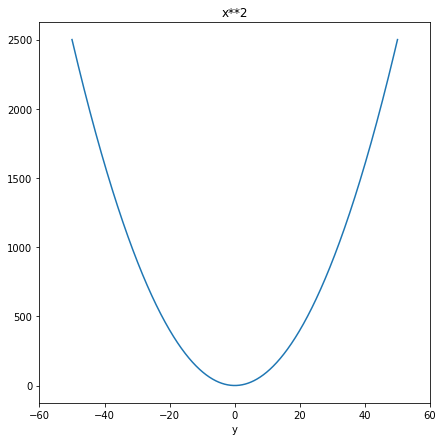

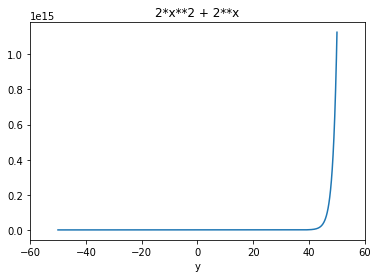

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(7,7))

plt.title("x**2")
plt.xlabel("x")
plt.xlabel("y")
plt.xlim(-60, 60)
plt.plot(z_1[:,0],z_1[:,1], label="x**2")
plt.show()


plt.title("2*x**2 + 2**x")
plt.xlabel("x")
plt.xlabel("y")
plt.xlim(-60, 60)
plt.plot(z_2[:,0],z_2[:,1], label="2*x**2 + 2**x")
plt.show()


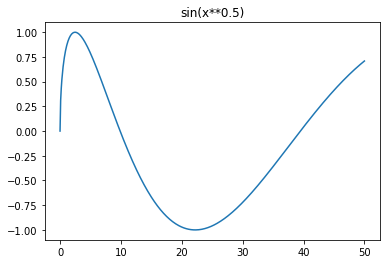

In [54]:
plt.title("sin(x**0.5)")
plt.plot(z_3[:,0],z_3[:,1])
plt.show()

# 【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。


今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。


また、最小のyをとる前後の勾配を表示してください。



In [86]:
def min_gradient(array_y, array_g):
    mn = array_y.min()
    index = array_y.argmin()
    before = array_g[index-1]
    after = array_g[index+1]
    
    return mn, before, after

print("配列z_1の最小値は{}、前後の勾配はそれぞれ{}、{}です。".format(min_gradient(z_1[:,1],g_1)[0],min_gradient(z_1[:,1],g_1)[1],min_gradient(z_1[:,1],g_1)[2]))
print("配列z_2の最小値は{}、前後の勾配はそれぞれ{}、{}です。".format(min_gradient(z_2[:,1],g_2)[0],min_gradient(z_2[:,1],g_2)[1],min_gradient(z_2[:,1],g_2)[2]))
print("配列z_3の最小値は{}、前後の勾配はそれぞれ{}、{}です。".format(min_gradient(z_3[:,1],g_3)[0],min_gradient(z_3[:,1],g_3)[1],min_gradient(z_3[:,1],g_3)[2]))
#print(min_gradient(z_1[:,1],g_1))
#print(min_gradient(z_2[:,1],g_2))
#print(min_gradient(z_3[:,1],g_3))


配列z_1の最小値は5.048709793414476e-25、前後の勾配はそれぞれ[-0.1]、[0.3]です。
配列z_2の最小値は0.9730329915366988、前後の勾配はそれぞれ[-0.57517572]、[1.11773463]です。
配列z_3の最小値は-0.9999997540298113、前後の勾配はそれぞれ[-0.00063884]、[0.00160612]です。
